# Wine Quality Classification

In [347]:
# EMİR AYDIN

In [348]:
import pandas as pd
import numpy as np
import seaborn as sns

In [349]:
df=pd.read_csv("wine.csv")

In [350]:
df.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


## Data Information

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [352]:
#Counting missing values
missing_values_count = df.isnull().sum() 
missing_values_count

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [353]:
df['quality']

0        bad
1        bad
2        bad
3       good
4        bad
        ... 
1594     bad
1595    good
1596    good
1597     bad
1598    good
Name: quality, Length: 1599, dtype: object

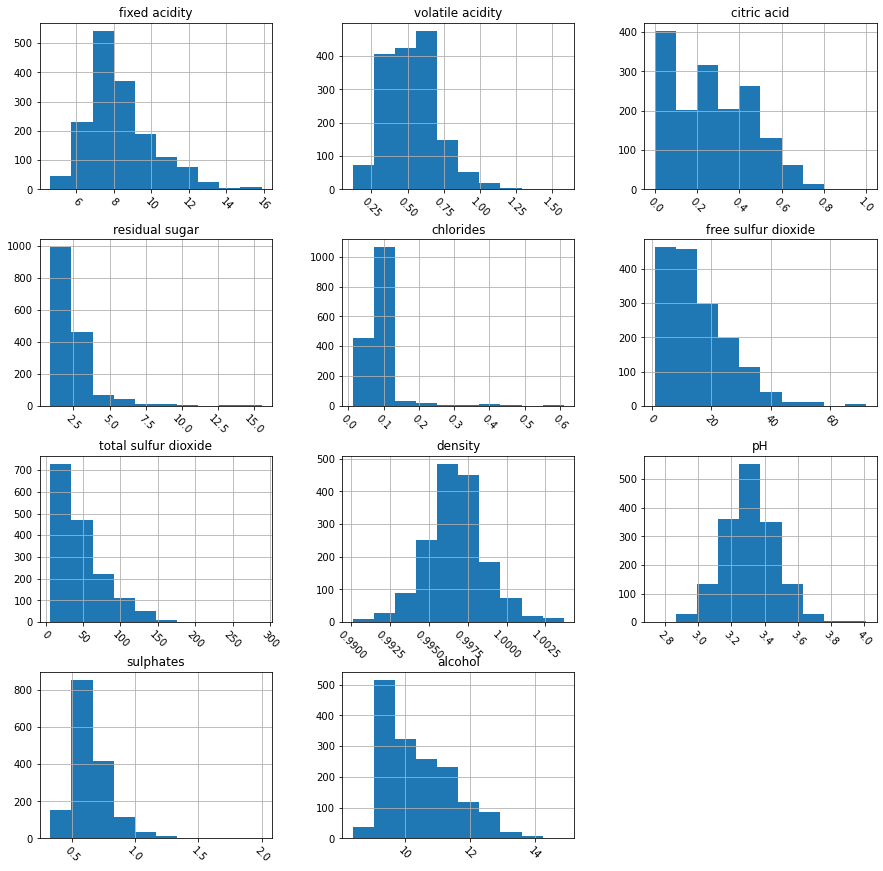

In [354]:
import matplotlib.pyplot as plt
# Histogram grid
df.hist(figsize=(15,15), xrot=-45)
plt.show()

## Target Variable (quality)

good    0.534709
bad     0.465291
Name: quality, dtype: float64


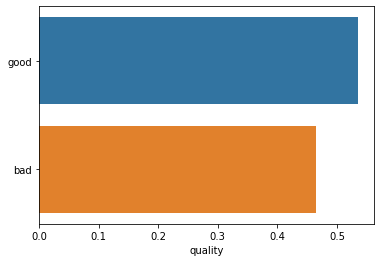

In [355]:
class_percentages = df['quality'].value_counts(normalize=True)
print(class_percentages)
sns.barplot(x=class_percentages, y=class_percentages.index, orient='h')
plt.show()

## Correlation

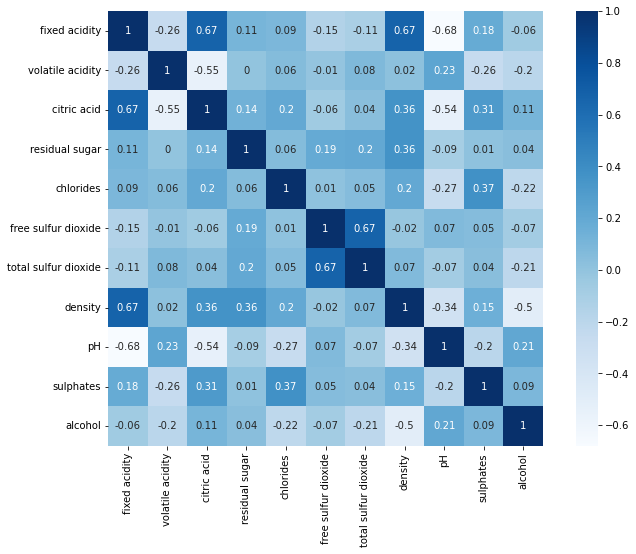

In [356]:
#Correlations between features
corr = df.corr().round(2)

plt.figure(figsize=(12,8))
_ = sns.heatmap(corr, cmap="Blues",  cbar=True, annot=True, square=True)

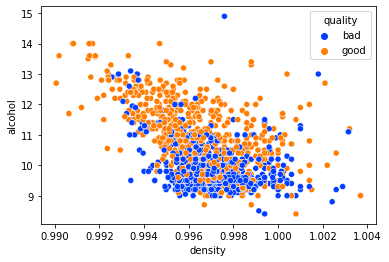

In [357]:
#Plotting the highest correlated pairs
plt.clf()
sns.scatterplot(data=df, x='density', y='alcohol', hue='quality', palette="bright")
plt.show()

## Creating Models with Hyperparameters

In [404]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

In [405]:
# Initializing models
rf1 = RandomForestRegressor(n_estimators=50, random_state=42,n_jobs=-1)
rf2 = RandomForestRegressor(n_estimators=50, max_features=0.5,n_jobs=-1)
percept = Perceptron(alpha=0.001)
tree = DecisionTreeClassifier(criterion='entropy') 
logr1 = LogisticRegression(solver='newton-cg', n_jobs=-1)
models=np.array([rf1,rf2,percept,tree,logr1])
model_names=np.array(["Random Forest_1","Random Forest_2","Perceptron","Decision Tree","Logistic Reg"])
model_names

array(['Random Forest_1', 'Random Forest_2', 'Perceptron',
       'Decision Tree', 'Logistic Reg'], dtype='<U15')

## Train / Test

In [406]:
df['quality_cat'] = df['quality'].astype('category').cat.codes
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,0


In [407]:
new_df=df.drop("quality", axis=1)

In [408]:
target=new_df.quality_cat
X=new_df.drop("quality_cat", axis=1)
#target=df.quality.map({'Very Poor': 0,'Poor': 1,'Medium': 2,'Good': 3,'Great': 4,'Excellent': 5}).values
#target=df.quality.map({3: 'Very Poor',4: 'Poor',5:'Medium' ,6:'Good' ,7:'Great' ,8: 'Excellent'})



In [409]:
target

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality_cat, Length: 1599, dtype: int8

In [410]:
from sklearn.model_selection import train_test_split


# Split dataset as test and train
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=1)

In [411]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [412]:
print(y_train)

701     1
56      0
142     1
863     0
1387    0
       ..
715     1
905     0
1096    1
235     1
1061    1
Name: quality_cat, Length: 1279, dtype: int8


In [413]:
y_test

75      0
1283    1
408     1
1281    1
1118    1
       ..
890     0
146     0
1551    0
1209    1
1220    1
Name: quality_cat, Length: 320, dtype: int8

In [414]:
# Declaring a new method for plotting confusion matrixes by using heatmap from seaborn
def plot_confusion_matrix(y_test, y_predicted):  
    conf_mat = pd.DataFrame(confusion_matrix(y_test, y_predicted))  
    fig = plt.figure(figsize=(12, 8))  
    sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt="g")  
    plt.title("Confusion Matrix")  
    plt.xlabel("Predicted Label")  
    plt.ylabel("True Label")  
    plt.show() 

In [415]:
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,confusion_matrix, ConfusionMatrixDisplay
accs_n_rsme=np.array([]) # Array for storing accuracies and rsmes of predictions
# Function for all 5 algorithms to make prediction with data that returns the accuracies
def predict_model(model,name,X1,X2,y1,y2):
    model.fit(X1,y1)
    y_predict=model.predict(X2).round()
    accur =accuracy_score(y2,y_predict)
    cm = confusion_matrix(y_predict,y2)
    rsme = np.sqrt(mean_squared_error(y2, y_predict))
    print("Accuracy of the ",name,": ",accur) # Printing accuracy of the model
    print(f"RSME of the {name} : {rsme}") # Printing rsme of the model
    print("Confusion Matrix of the ",name," : ") 
    plot_confusion_matrix(y2,y_predict)
    #plt.figure(figsize=(4, 2))
    #sns.heatmap(cm,xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'], fmt='.1f',annot=True, cmap="coolwarm") #Plotting confusion matrix of the model
    return accur,rsme

## Evaluating models

Random Forest_1
Accuracy of the  Random Forest_1 :  0.809375
RSME of the Random Forest_1 : 0.4366062299143245
Confusion Matrix of the  Random Forest_1  : 


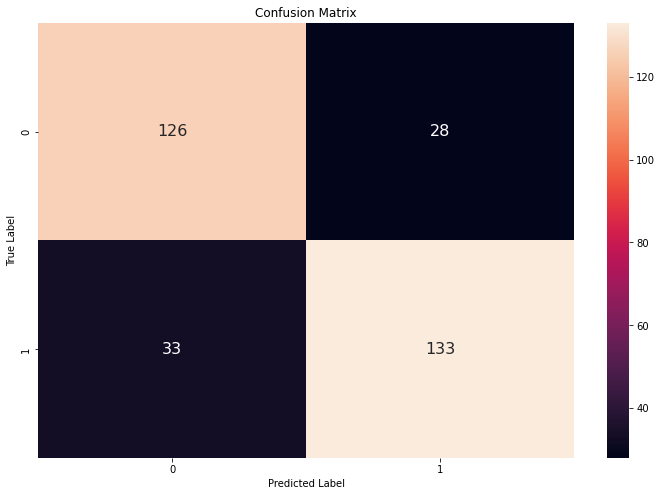

Random Forest_2
Accuracy of the  Random Forest_2 :  0.815625
RSME of the Random Forest_2 : 0.4293891009329417
Confusion Matrix of the  Random Forest_2  : 


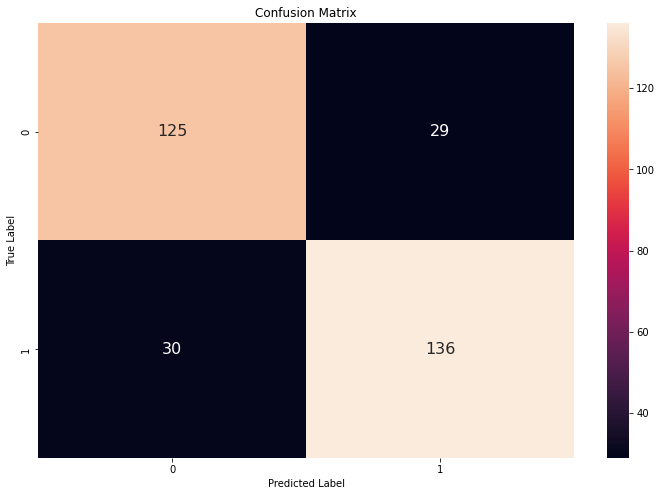

Perceptron
Accuracy of the  Perceptron :  0.559375
RSME of the Perceptron : 0.6637959023675877
Confusion Matrix of the  Perceptron  : 


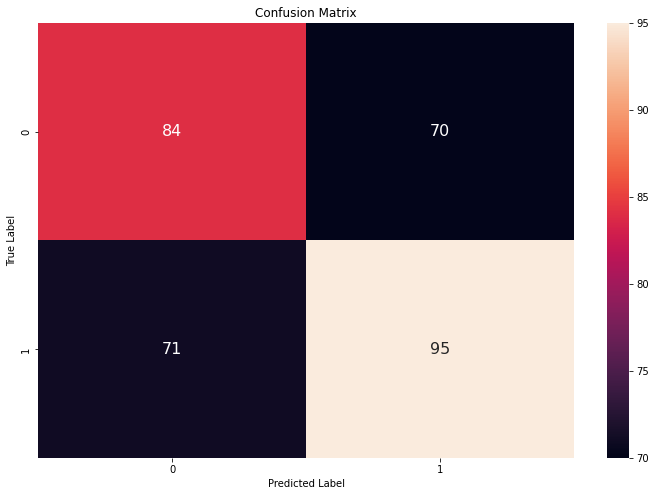

Decision Tree
Accuracy of the  Decision Tree :  0.759375
RSME of the Decision Tree : 0.4905354217587146
Confusion Matrix of the  Decision Tree  : 


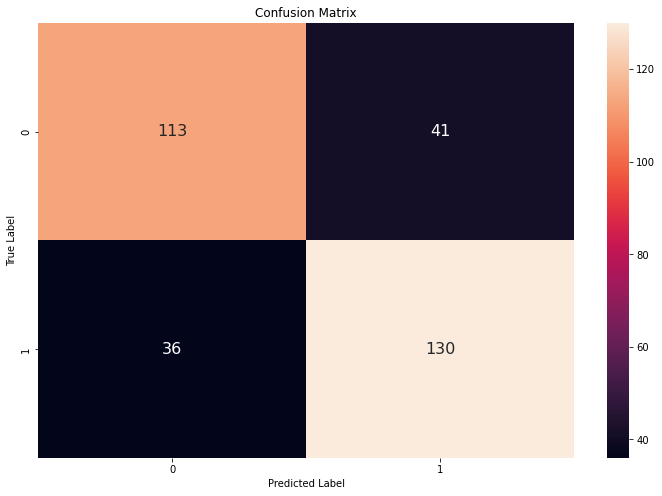

Logistic Reg
Accuracy of the  Logistic Reg :  0.75
RSME of the Logistic Reg : 0.5
Confusion Matrix of the  Logistic Reg  : 


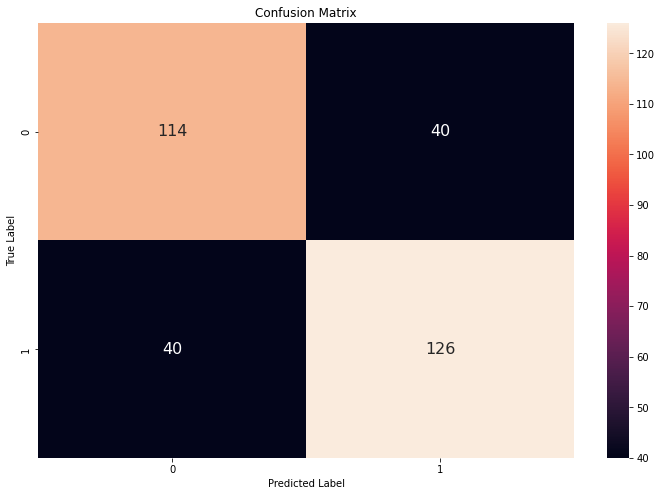

In [416]:
for i in range(models.size):
    print(model_names[i])
    acc0,rsme0=predict_model(models[i],model_names[i],X_train_std,X_test_std,y_train,y_test)
    accs_n_rsme=np.append(accs_n_rsme,acc0)
    accs_n_rsme=np.append(accs_n_rsme,rsme0)
    

## Accuracy Table

In [417]:
# Resizing array of accuracies to create a table
accs_n_rsme=np.resize(accs_n_rsme,(5,2)) 

accuracy_table=pd.DataFrame(accs_n_rsme, columns=['Accuracy', 'RSME'], index=model_names)
accuracy_table

,Accuracy,RSME
Random Forest_1,0.809375,0.436606
Random Forest_2,0.815625,0.429389
Perceptron,0.559375,0.663796
Decision Tree,0.759375,0.490535
Logistic Reg,0.750000,0.500000
